<a href="https://colab.research.google.com/github/mind-shaker/fast_ai_1/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [11]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.816473,2.294266,00:01


epoch,train_loss,valid_loss,time
0,1.835179,1.686965,00:01
1,1.594226,1.636858,00:01
2,1.482600,1.274447,00:01
3,1.336613,1.125568,00:01
4,1.214839,0.948137,00:01
5,1.103674,0.859851,00:01
6,1.007785,0.839879,00:01
7,0.932952,0.822003,00:01


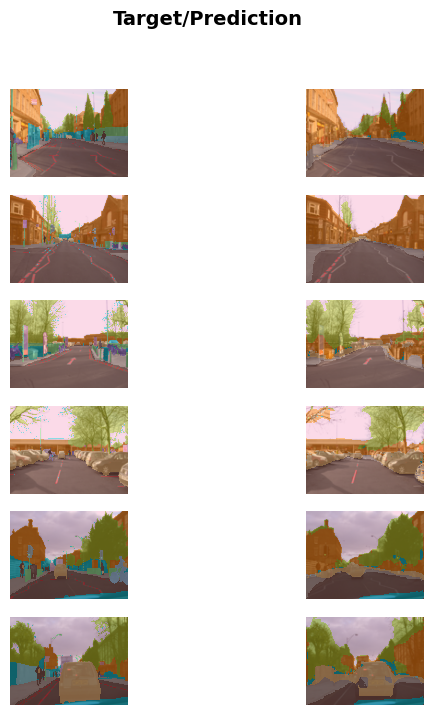

In [12]:
learn.show_results(max_n=6, figsize=(7,8))

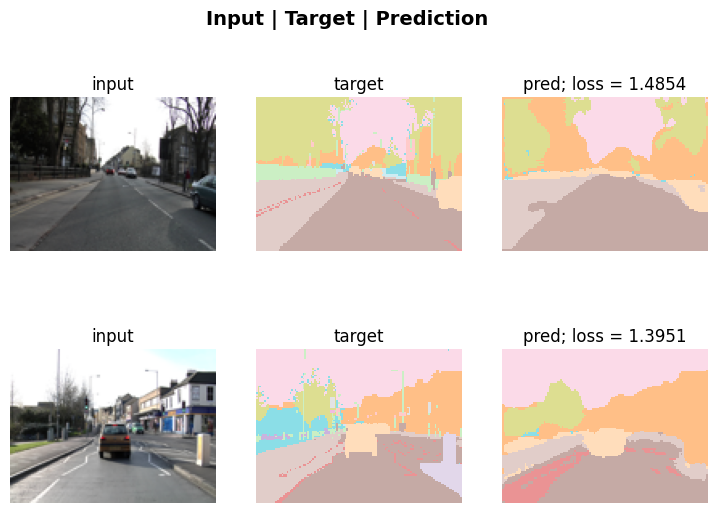

In [13]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)